#We are going to implement Box-Muller algorithm for drawing samples from uniform distribution

We tried with jax but there were too much to learn handling jax arrays in this short time so I kept it simple in numpy.

In [15]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

Its a common method of sampling from a given uniform distribution to normal distribution.


Box-Muller: we need two random uniform variables and now we create two normal random variable using the Box_muller method. Here we only focus on one cosine term and the random variables will be independent as CosA is not dependent of CosB if A is not as same as B; here i think the key focus is to implement Box_muller method 

In [28]:
#we want to define a helper a function that generates the normal distribution from uniform one
def f(theta, E):
  return np.cos(theta)*np.sqrt(E)
#we define the box muller algorithm
def Box_Muller(N , mu , sigma, n):
  out = np.zeros(N , dtype = object)
  for i in np.arange(N):
    '''Theta = np.zeros(n  dtype = float)
    U = np.zeros(n , size = n, dtype = float)'''

    theta = np.random.uniform(0, 2*np.pi , size = n)  #instead of jax.random.uniform
    #Theta[i]=theta
    '''Theta = Theta.at[i].set(theta)
    key +=1'''

    u = np.random.uniform(0,1,size = n) #instead of jax.random.uniform
    '''U = U.at[i].set(u)
    key +=1'''
    #print(type(u))
    E = np.sqrt(-2*np.log(u))
    X = f(theta, E)
#    X = X.T
    out[i] = X
  return out

n = 10 #dimension
#key = jax.random.PRNGKey(0)
mu =np.zeros(n, dtype = np.float32)# it can be changed
sigma = np.identity(n , dtype = np.float32)#can be changed
N = 10000
a= Box_Muller(N, mu, sigma, n)
print(a)

[array([ 0.1997367 , -0.15055756, -1.59155697,  0.25058025, -0.10578529,
        -0.0504351 , -0.96149264,  0.14095673, -0.95478262,  0.88671146])
 array([ 1.35116991,  0.28909569,  1.29809016,  0.93262035,  0.17465732,
        -0.42572885,  0.0189699 ,  0.6490998 ,  0.68260461, -0.85978355])
 array([ 0.74579833, -0.35527196,  0.89035134,  0.28528468,  0.92323699,
         0.43205168, -0.35885549, -1.50878615,  0.33076046,  1.20122153])
 ...
 array([-0.37855848, -0.55117247,  0.67382102, -0.8780811 ,  0.5576467 ,
         0.25399418, -0.79425322,  0.48487043,  1.06533133,  0.46628484])
 array([-0.90072402, -0.22206375, -1.15274466, -0.24379874, -0.43560121,
        -0.63288561,  0.71768578,  0.35945568, -0.89645047, -0.85591563])
 array([ 0.88847777, -0.63365462,  1.04746299,  0.62685331, -1.11486779,
        -1.05255303,  0.18607169,  0.7729554 ,  0.36166794, -0.99795498])]


In [29]:
def phi(X, mu, sigma):
  return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(X-mu)**2/(2*sigma**2))

In [37]:
X = np.zeros(N)
for i in range(N):
  X[i]= a[i][3]
X

array([ 0.25058025,  0.93262035,  0.28528468, ..., -0.8780811 ,
       -0.24379874,  0.62685331])

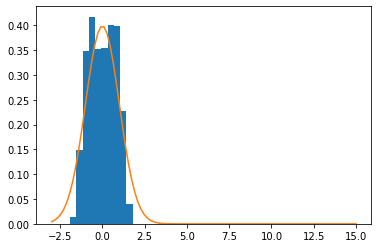

In [39]:
plt.figure()
plt.hist(X, bins=10, density = True)
xx = np.linspace(-3,15,100)
plt.plot(xx,phi(xx,0,1))